In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb


# Moving Window Coefficients

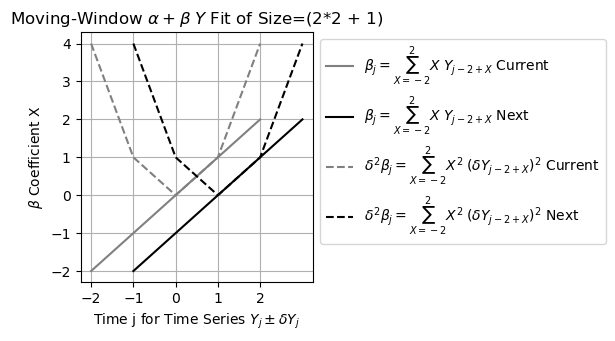

In [5]:
H=2

fig, ax = plt.subplots(figsize=(3,3.25))
ax.set_title(r'Moving-Window $\alpha + \beta\; Y$ Fit of Size=(2*2 + 1)')
ax.set_xlabel(r'Time j for Time Series $Y_{j} \pm \delta Y_{j}$')
ax.set_xticks(range(-H, H+1))
ax.set_ylabel(r'$\beta$ Coefficient X')
ax.set_yticks(range(-H, H**2+1))
plt.grid(True)

ax.plot(range(-H, H+1), range(-H, H+1), color='gray', 
              label=r'$\beta_j = \sum_{X=-2}^{2} X \; Y_{j-2+X}$ Current')
ax.plot(range(-H+1, H+2), range(-H, H+1), color='black', 
              label=r'$\beta_j = \sum_{X=-2}^{2} X \; Y_{j-2+X}$ Next')
ax.plot(range(-H, H+1), [x**2 for x in range(-H, H+1)], color='gray', ls='--',
              label=r'$\delta^2 \beta_j = \sum_{X=-2}^{2} X^2 \; (\delta Y_{j-2+X})^2$ Current')
ax.plot(range(-H+1, H+2), [x**2 for x in range(-H, H+1)], color='black', ls='--', 
              label=r'$\delta^2 \beta_j = \sum_{X=-2}^{2} X^2 \; (\delta Y_{j-2+X})^2$ Next')

ax.legend(bbox_to_anchor=(1.0, 1.0))

# One Case

In [12]:
df = pd.read_csv("../Python/Output/MovingLineFit.txt", sep='\t')
df.head()

,Time Index,Input Value,Input Uncertainty,Local 0 Value,Local 0 Uncertainty,Local 1 Value,Local 1 Uncertainty,Unadjusted 0 Value,Unadjusted 0 Uncertainty,Unadjusted 1 Value,Unadjusted 1 Uncertainty,Adjusted 0 Value,Adjusted 0 Uncertainty,Adjusted 1 Value,Adjusted 1 Uncertainty
0,0,0.332156,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.753271,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2.151265,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2.943907,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,3.857993,0.2,2.007718,0.089443,0.924231,0.063246,2.007718,0.089443,0.924231,0.063246,2.007718,0.089443,0.924231,0.063246


In [13]:
df.columns

Index(['Time Index', 'Input Value', 'Input Uncertainty', 'Local 0 Value',
       'Local 0 Uncertainty', 'Local 1 Value', 'Local 1 Uncertainty',
       'Unadjusted 0 Value', 'Unadjusted 0 Uncertainty', 'Unadjusted 1 Value',
       'Unadjusted 1 Uncertainty', 'Adjusted 0 Value',
       'Adjusted 0 Uncertainty', 'Adjusted 1 Value', 'Adjusted 1 Uncertainty'],
      dtype='object')

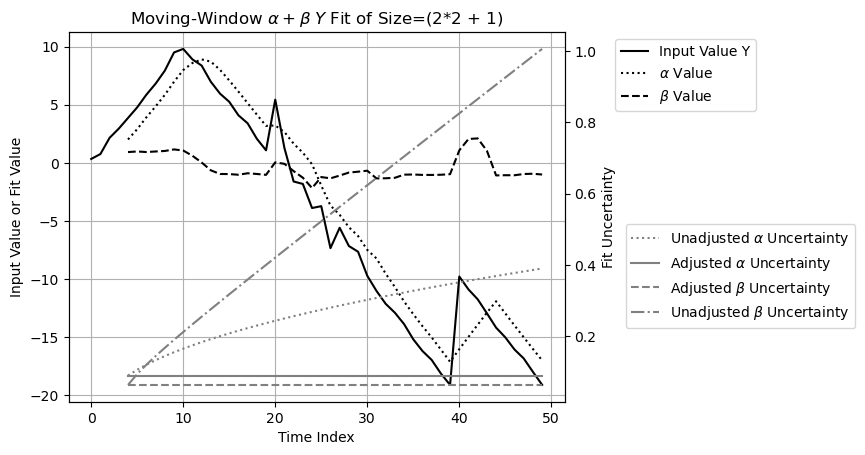

In [14]:
fig, ax = plt.subplots()
ax.set_title(r'Moving-Window $\alpha + \beta\; Y$ Fit of Size=(2*2 + 1)')
ax.set_xlabel('Time Index')
ax.set_ylabel('Input Value or Fit Value')
plt.grid(True)

ax.plot(df['Time Index'], df['Input Value'], 'k-', label='Input Value Y')
ax.plot(df['Time Index'], df['Unadjusted 0 Value'], 'k:', label=r'$\alpha$ Value')
ax.plot(df['Time Index'], df['Unadjusted 1 Value'], 'k--', label=r'$\beta$ Value')

ax2 = ax.twinx()
ax2.set_ylabel('Fit Uncertainty')
ax2.plot(df['Time Index'], df['Unadjusted 0 Uncertainty'], color='gray', ls=':', label=r'Unadjusted $\alpha$ Uncertainty')
ax2.plot(df['Time Index'], df['Adjusted 0 Uncertainty'], color='gray', ls='-', label=r'Adjusted $\alpha$ Uncertainty')
ax2.plot(df['Time Index'], df['Adjusted 1 Uncertainty'], color='gray', ls='--', label=r'Adjusted $\beta$ Uncertainty')
ax2.plot(df['Time Index'], df['Unadjusted 1 Uncertainty'], color='gray', ls='-.', label=r'Unadjusted $\beta$ Uncertainty')

ax.legend(bbox_to_anchor=(1.4, 1.0))
ax2.legend(bbox_to_anchor=(1.6, 0.5))

In [9]:
df = pd.read_csv("../Python/Output/MovingLineFitStat.txt", sep='\t')
df.head()

,Time Index,Input Value,Input Uncertainty,Fit 0 Deviation,Fit 0 Mean,Fit 0 Minimum,Fit 0 Maxium,Fit 1 Deviation,Fit 1 Mean,Fit 1 Minimum,Fit 1 Maxium
0,0,-0.173117,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.127459,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2.223808,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2.635849,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4.070879,0.2,1.0295,22.408668,18.32093,25.603688,0.983099,0.041217,-3.157819,2.764327


In [10]:
df.columns

Index(['Time Index', 'Input Value', 'Input Uncertainty', 'Fit 0 Deviation',
       'Fit 0 Mean', 'Fit 0 Minimum', 'Fit 0 Maxium', 'Fit 1 Deviation',
       'Fit 1 Mean', 'Fit 1 Minimum', 'Fit 1 Maxium'],
      dtype='object')

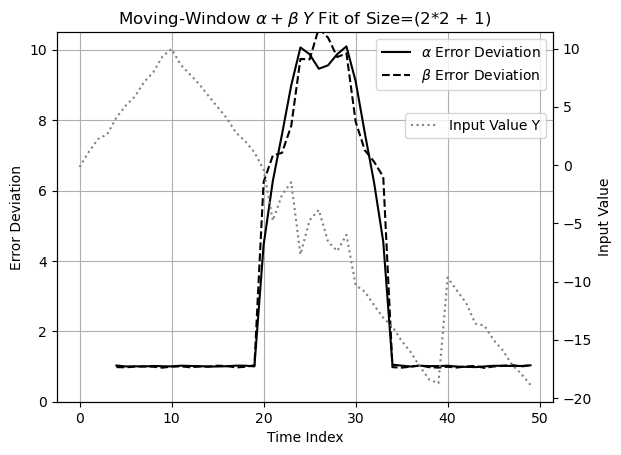

In [11]:
fig, ax = plt.subplots()
ax.set_title(r'Moving-Window $\alpha + \beta\; Y$ Fit of Size=(2*2 + 1)')
ax.set_xlabel('Time Index')
ax.set_ylabel('Error Deviation')
ax.set_ylim((0,10.5))
plt.grid(True)

ax.plot(df['Time Index'], df['Fit 0 Deviation'], 'k-', label=r'$\alpha$ Error Deviation')
ax.plot(df['Time Index'], df['Fit 1 Deviation'], 'k--', label=r'$\beta$ Error Deviation')

ax2 = ax.twinx()
ax2.set_ylabel('Input Value')
ax2.plot(df['Time Index'], df['Input Value'], color='gray', ls=':', label='Input Value Y')

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax2.legend(bbox_to_anchor=(1.0, 0.8))